In [52]:
import cv2
import pickle
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

In [53]:
infile = open('data/data8.pickle','rb')
new_dict = pickle.load(infile)
print(new_dict['y_validation'].shape)
print(new_dict['x_train'].shape)

(4410,)
(86989, 1, 32, 32)


In [54]:
stops = new_dict["x_train"][new_dict['y_train']==14]
rest = new_dict["x_train"][new_dict['y_train']!=14]

print(rest.shape, stops.shape)


(84966, 1, 32, 32) (2023, 1, 32, 32)


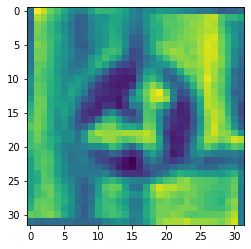

In [81]:
plt.imshow(rest[0][0])

In [56]:
ind = np.random.choice(np.arange((rest.shape)[0]), size=stops.shape[0], replace=False)
resto = np.asarray([rest[i][0] for i in ind])
resto.shape

(2023, 32, 32)

## Vamos a entrenar Haar Cascade para conseguir .xml para detectar señales con opencv

In [57]:
#creamos nuestro dataset de pos y stop.info
os.remove("stop.info")
f= open("stop.info","w+")
for i,stop in enumerate(stops):
    matplotlib.image.imsave(f'data/training/stop/pos/stop{i}.jpg', stop[0,:,:])   
    f.write(f"data/training/stop/pos/stop{i}.jpg 1 0 0 32 32\n" )
f.close()

In [58]:
#creamos dataset neg
os.remove("bg.txt")
f= open("bg.txt","w+")
for i,r in enumerate(resto):
    matplotlib.image.imsave(f'data/training/stop/neg/neg{i}.jpg', r)
    f.write(f"data/training/stop/neg/neg{i}.jpg\n" )

In [65]:
os.remove("data/classifiers/cascade.xml")
os.remove("data/classifiers/params.xml")
os.remove("data/classifiers/stage0.xml")
os.remove("data/classifiers/stage1.xml")

In [66]:
os.remove("stops.vec")
!opencv_createsamples -info stop.info -num 2000 -w 32 -h 32 -vec stops.vec

Info file name: stop.info
Img file name: (NULL)
Vec file name: stops.vec
BG  file name: (NULL)
Num: 2000
BG color: 0
BG threshold: 80
Invert: FALSE
Max intensity deviation: 40
Max x angle: 1.1
Max y angle: 1.1
Max z angle: 0.5
Show samples: FALSE
Width: 32
Height: 32
Max Scale: -1
RNG Seed: 12345
Create training samples from images collection...
Done. Created 2000 samples


In [67]:
!opencv_traincascade -data data/classifiers -vec stops.vec -bg bg.txt -numPos 1300 -numNeg 436 -numStages 10  -w 32 -h 32 -featureType HAAR -mode ALL 

PARAMETERS:
cascadeDirName: data/classifiers
vecFileName: stops.vec
bgFileName: bg.txt
numPos: 1300
numNeg: 436
numStages: 10
precalcValBufSize[Mb] : 1024
precalcIdxBufSize[Mb] : 1024
acceptanceRatioBreakValue : -1
stageType: BOOST
featureType: HAAR
sampleWidth: 32
sampleHeight: 32
boostType: GAB
minHitRate: 0.995
maxFalseAlarmRate: 0.5
weightTrimRate: 0.95
maxDepth: 1
maxWeakCount: 100
mode: ALL
Number of unique features given windowSize [32,32] : 832665

===== TRAINING 0-stage =====
<BEGIN
POS count : consumed   1300 : 1300


NEG count : acceptanceRatio    436 : 1


Precalculation time: 17
+----+---------+---------+
|  N |    HR   |    FA   |
+----+---------+---------+
|   1|        1|        1|
+----+---------+---------+
|   2|        1|        1|
+----+---------+---------+
|   3|        1| 0.497706|
+----+---------+---------+
END>
Training until now has taken 0 days 0 hours 6 minutes 1 seconds.

===== TRAINING 1-stage =====
<BEGIN
POS count : consumed   1300 : 1300
NEG count : acceptanceRatio    436 : 0.508751
Precalculation time: 14
+----+---------+---------+
|  N |    HR   |    FA   |
+----+---------+---------+
|   1|        1|        1|
+----+---------+---------+
|   2|        1|        1|
+----+---------+---------+
|   3| 0.999231|  0.59633|
+----+---------+---------+
|   4| 0.999231|  0.59633|
+----+---------+---------+
|   5| 0.999231| 0.431193|
+----+---------+---------+
END>
Training until now has taken 0 days 0 hours 16 minutes 15 seconds.

===== TRAINING 2-stage =====
<BEGIN
POS count : consumed   1300 : 1301
NEG count : acceptanceRati

TypeError: Image data of dtype object cannot be converted to float

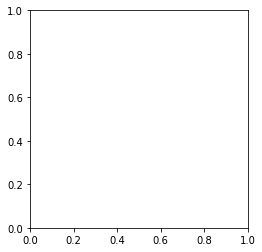